## NVDIA, AMD and INTEL Stock Data Analysis

In this project, we will analyze **NVDIA**, **AMD** and **Intel** stock market data using pandas, matplotlib and seaborn modules.

In [1]:
# import modules

# python data science modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Yahoo Finance module
import yfinance as yf

We will use the `yfinance` module to download the stock data of **AMD**, **Intel**, and **NVIDIA**
for the period between **2017-10-01** and **2023-10-01**.

In [2]:
data_intel = yf.download('INTC', start='2017-10-01', end='2023-10-01')
data_amd = yf.download('AMD', start='2017-10-01', end='2023-10-01')
data_nvdia = yf.download('NVDA', start='2017-07-01', end='2023-10-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# show first five rows AMD dataframe

data_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-02,12.80,12.85,12.62,12.71,12.71,34461100
2017-10-03,12.73,13.48,12.70,13.42,13.42,85174000
2017-10-04,13.31,13.50,13.15,13.31,13.31,42303200
2017-10-05,13.38,13.46,13.21,13.34,13.34,34758600
2017-10-06,13.22,13.39,13.18,13.23,13.23,28258700


We can check the number of columns and rows of dataframes we created

In [4]:
data_amd.shape

(1509, 6)

Using matplotlib we can plot **Close** prices

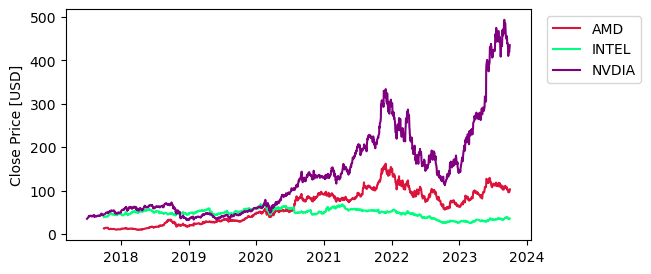

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.plot(data_amd.index, data_amd['Close'], label='AMD', color='crimson')
ax.plot(data_intel.index, data_intel['Close'], label='INTEL', color='springgreen')
ax.plot(data_nvdia.index, data_nvdia['Close'], label='NVDIA', color='purple')

ax.set_ylabel('Close Price [USD]')

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))

For a more clear picture, we can show change of percentages with respect to their beginning points

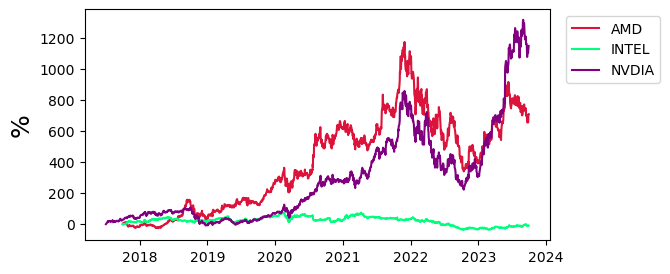

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.plot(data_amd.index, (data_amd['Close'] - data_amd['Close'][0]) / data_amd['Close'][0] * 100,
       label='AMD', color='crimson')
ax.plot(data_intel.index, (data_intel['Close'] - data_intel['Close'][0]) / data_intel['Close'][0] * 100,
       label='INTEL', color='springgreen')
ax.plot(data_nvdia.index, (data_nvdia['Close'] - data_nvdia['Close'][0]) / data_nvdia['Close'][0] * 100
       , label='NVDIA', color='purple')

ax.set_ylabel('%', fontsize=18)

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))

### 30-Days Moving Averages

Due to the high volatility of stock prices and their rapid changes over time, we can use a 30-day moving average to observe any potential trends or patterns

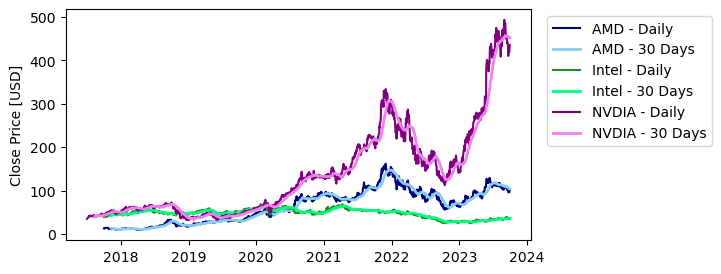

In [7]:
### moving averages
data_intel['MovAv-30'] = data_intel['Close'].rolling(30).mean()
data_amd['MovAv-30'] = data_amd['Close'].rolling(30).mean()
data_nvdia['MovAv-30'] = data_nvdia['Close'].rolling(30).mean()

# create 6x5 plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

# Plot daily and 30 day average data
ax.plot(data_amd.index, data_amd['Close'], label='AMD - Daily', color='navy')
ax.plot(data_amd.index, data_amd['MovAv-30'], label='AMD - 30 Days', color='skyblue', linewidth=2)

ax.plot(data_intel.index, data_intel['Close'], label='Intel - Daily', color='forestgreen')
ax.plot(data_intel.index, data_intel['MovAv-30'], label='Intel - 30 Days', color='springgreen', linewidth=2)

ax.plot(data_nvdia.index, data_nvdia['Close'], label='NVDIA - Daily', color='purple')
ax.plot(data_nvdia.index, data_nvdia['MovAv-30'], label='NVDIA - 30 Days', color='violet', linewidth=2)


ax.set_ylabel('Close Price [USD]')

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))

We can also create a graph illustrating the fluctuation in the trading volume of a stock over a period of time.

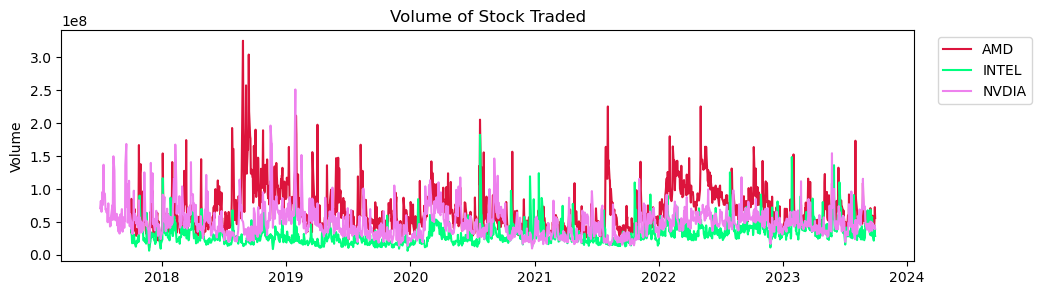

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(11, 3))

ax.plot(data_amd.index, data_amd['Volume'], label='AMD', color='crimson')
ax.plot(data_intel.index, data_intel['Volume'], label='INTEL', color='springgreen')
ax.plot(data_nvdia.index, data_nvdia['Volume'], label='NVDIA', color='violet')

ax.set_ylabel('Volume')

ax.set_title('Volume of Stock Traded')

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))

The graph illustrates the varying trading volumes of the three companies,
with AMD exhibiting notably higher trading activity than the others,
indicating its relatively higher stock demand and liquidity.

### Pair Plot

We can employ a pair plot to visually represent the associations between various pairs of variables in the dataset.

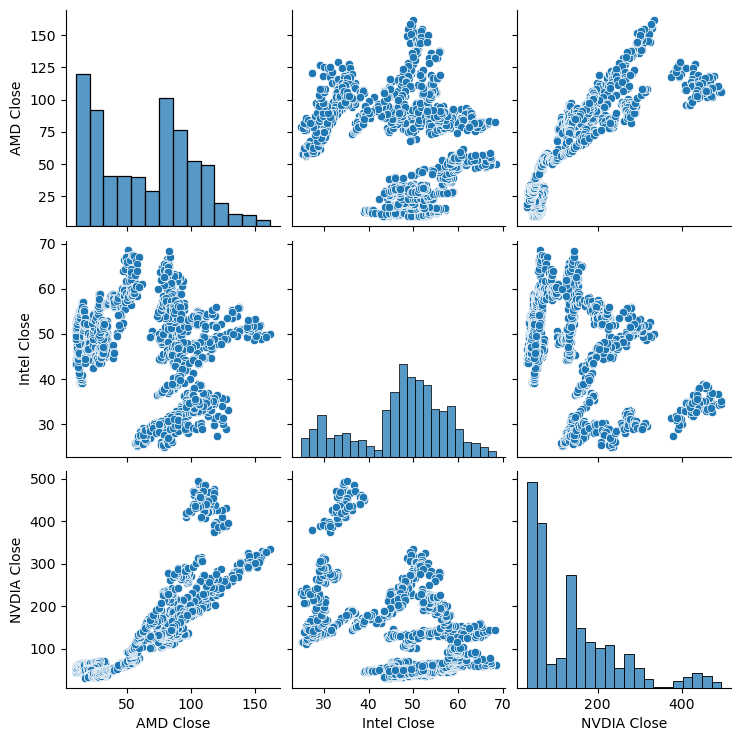

In [9]:
df_scatter = pd.DataFrame()
df_scatter['AMD Close'] = data_amd['Close']
df_scatter['Intel Close'] = data_intel['Close']
df_scatter['NVDIA Close'] = data_nvdia['Close']


_ = sns.pairplot(df_scatter)

The graph displays histograms for each company and subsequent scatter plots,
comparing two companies' stocks at a time. It becomes evident from the graph
that there is a loose linear correlation between AMD and NVIDIA stocks.
The visual representation allows us to easily discern the relationship
between the two companies' stock price movements, indicating some degree
of connection between them in terms of market behavior.

If we look at the linear correlation between AMD and NVIDIA Close prices closely:

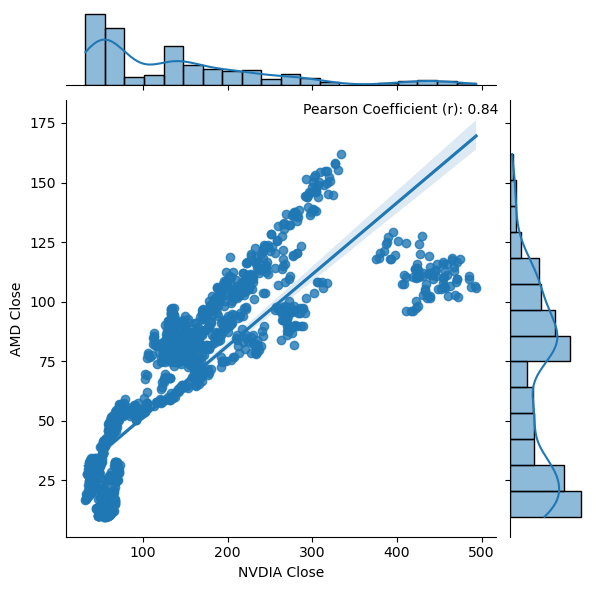

In [10]:
import scipy.stats as stats

_ = sns.jointplot(x='NVDIA Close', y='AMD Close',data=df_scatter, kind="reg")
r, p = stats.pearsonr(df_scatter['NVDIA Close'], df_scatter['AMD Close'])

text = f"Pearson Coefficient (r): {r:.2f}"
_ = _.ax_joint.annotate(text, xy=(0.78, 0.97), xycoords='axes fraction', ha='center', fontsize=10)

r-value of 0.87 suggests a strong positive linear relationship between NVIDIA and AMD Close prices. Given that both AMD and NVIDIA are technology companies operating in the semiconductor industry, it is anticipated that they would exhibit similar market trends, consumer demand, and technological advancements. Consequently, their stock prices are likely to demonstrate parallel fluctuations over time

### Boxplot

Additionally, we have the option to generate box plots, which are a visual tool for illustrating the distribution of a dataset. Box plots provide insights into the median, quartiles, and any potential outliers within the data.

Below, you can observe box plots that display the changes in close prices for each year in the NVIDIA dataset.

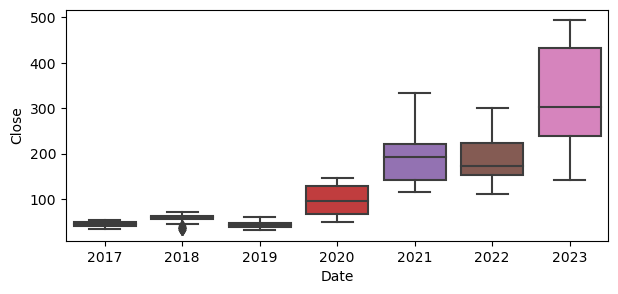

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,3))

_ = sns.boxplot(x = data_nvdia.index.year, 
                y = data_nvdia['Close'], 
                ax = ax1)